1.9436856448420148


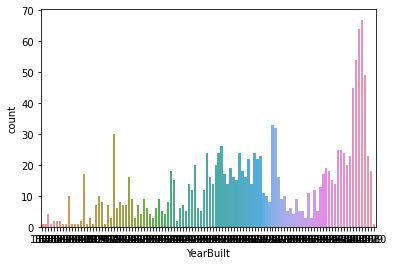

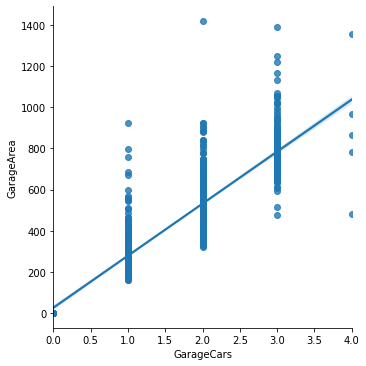

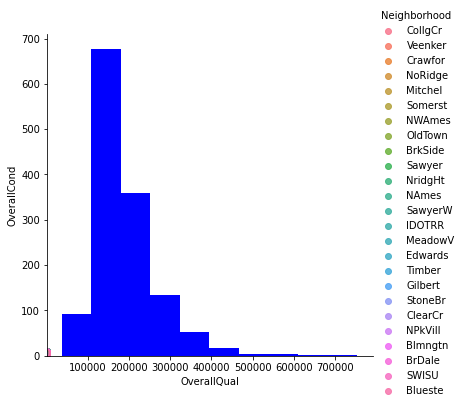

0.29010991418466675


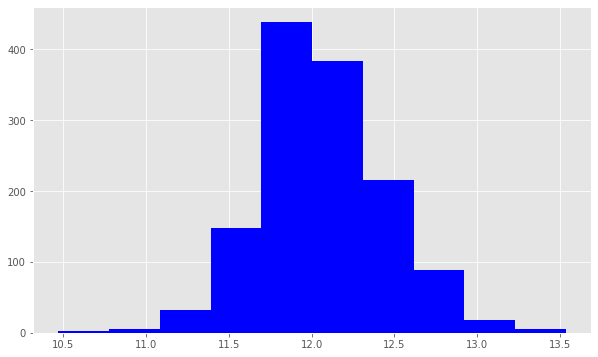

SalePrice      1.000000
OverallQual    0.783546
GrLivArea      0.711706
GarageCars     0.640154
GarageArea     0.607535
Name: SalePrice, dtype: float64 

EnclosedPorch   -0.127385
KitchenAbvGr    -0.111408
OverallCond     -0.108627
MSSubClass      -0.079599
BsmtFinSF2      -0.031226
Name: SalePrice, dtype: float64
             SalePrice
OverallQual           
2              47655.5
3             100000.0
4             111000.0
5             134900.0
6             161750.0
7             202150.0
8             270000.0
9             345000.0
10            426000.0


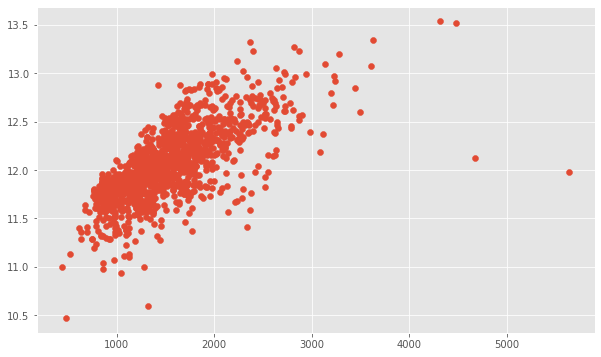

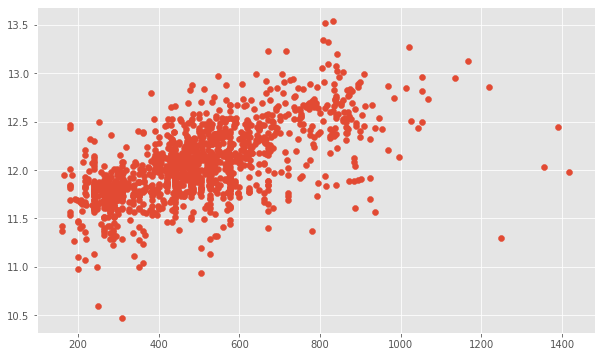

        Id  MSSubClass MSZoning  LotArea Street LotShape LandContour  \
0        1          60       RL     8450   Pave      Reg         Lvl   
1        2          20       RL     9600   Pave      Reg         Lvl   
2        3          60       RL    11250   Pave      IR1         Lvl   
3        4          70       RL     9550   Pave      IR1         Lvl   
4        5          60       RL    14260   Pave      IR1         Lvl   
...    ...         ...      ...      ...    ...      ...         ...   
1455  1456          60       RL     7917   Pave      Reg         Lvl   
1456  1457          20       RL    13175   Pave      Reg         Lvl   
1457  1458          70       RL     9042   Pave      Reg         Lvl   
1458  1459          20       RL     9717   Pave      Reg         Lvl   
1459  1460          20       RL     9937   Pave      Reg         Lvl   

     Utilities LotConfig LandSlope  ... EnclosedPorch 3SsnPorch ScreenPorch  \
0       AllPub    Inside       Gtl  ...             0   

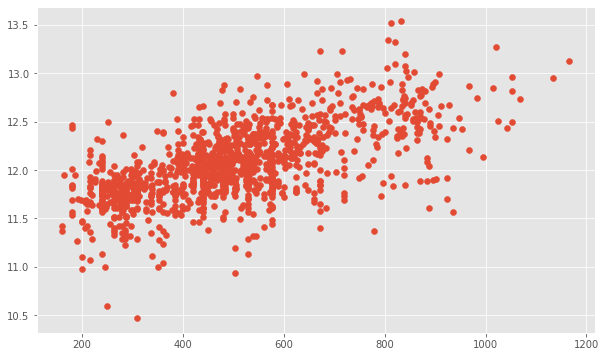

ValueError: could not convert string to float: 'RH'

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
import seaborn as sns


veri = pd.read_csv('sample_submission.csv')
test= pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

veri.head
test.head
train.head
#veri.shape (1459,2)
#test.shape  (1459,80)
#train.shape (1460,81)
#Elimizdeki veriyi görüntü haline getir

sns.countplot(x="YearBuilt",data=train)

sns.lmplot(x="GarageCars",y="GarageArea",data=train)

sns.lmplot(x="OverallQual",y="OverallCond",data=train,hue="Neighborhood")
#traindeki boşlukalrı saptama ve kaldırma işlemi aynı işlem tabi ki testtede yapıldı :)
#sns.heatmap(train.isnull(),yticklabels=False,cmap="viridis")
#sns.heatmap(test.isnull(),yticklabels=False,cmap="viridis")
train.drop(["PoolQC","FireplaceQu","LotFrontage","Alley","Fence","MiscFeature"],axis=1,inplace=True)
test.drop(["PoolQC","FireplaceQu","LotFrontage","Alley","Fence","MiscFeature"],axis=1,inplace=True)


train.dropna(inplace=True)
test.dropna(inplace=True)
#train.isnull().sum()
#test.isnull().sum()

train.dtypes
train.SalePrice.describe()
print (train.SalePrice.skew())
plt.style.use(style="ggplot")
plt.rcParams["figure.figsize"]=(10,6)
plt.hist(train.SalePrice,color="Blue")
plt.show() 

target=np.log(train.SalePrice)
print ( target.skew())
plt.hist(target,color="Blue")
plt.show()

numeric_features=train.select_dtypes(include=[np.number])
numeric_features.dtypes


corr = numeric_features.corr()
print(corr.SalePrice.sort_values(ascending=False)[:5],"\n") #En yüksek 5 liye bakıyorum
print(corr.SalePrice.sort_values (ascending=True) [: 5]) # SalesPrice ile en düşük korelasyona sahip beşe bakıyorum
train.OverallQual.unique()#Alakası en yüksek olan değeri inceliyorum. Kalan değerleride inceliycez
quality_pivot=train.pivot_table(index="OverallQual",values="SalePrice",aggfunc=np.median)
print (quality_pivot)

plt.scatter(x=train["GrLivArea"],y=target) 
plt.show()

plt.scatter(x=train["GarageArea"], y =target)
plt.show()

train=train[train.GarageArea <1200]
print (train)
plt.scatter(x=train.GarageArea,y=np.log(train.SalePrice)) 
plt.show()



 #Bazı verileri sayısal hale getirmek
Street=pd.get_dummies(train["Street"],drop_first=True)
LotS=pd.get_dummies(train["LotShape"],drop_first=True)
ExQual=pd.get_dummies(train["ExterQual"],drop_first=True)
Street=pd.get_dummies(test["Street"],drop_first=True)

LotS=pd.get_dummies(test["LotShape"],drop_first=True)
ExQual=pd.get_dummies(test["ExterQual"],drop_first=True)
test.drop(["Street","LotShape","ExterQual","CentralAir"],axis=1,inplace=True)
train.drop(["Street","LotShape","ExterQual","CentralAir"],axis=1,inplace=True)

#Veri temizleme ve veri ön işleme tamamlandı

data=train.select_dtypes(include=[np.number]).interpolate().dropna()
y=np.log(train.SalePrice)
x=data.drop(['SalePrice','Id'], axis=1)
X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=.33)

lr=linear_model.LinearRegression()

model=lr.fit(X_train,y_train)
predictions=model.predict(test)
print ("RMSE is: \n", mean_squared_error(y_test,predictions))
actual_values=veri.drop(['SalePrice','Id'], axis=1)
plt.scatter(predictions,actual_values,alpha=.75,color="b") 
plt.xlabel("Predicted Price") 
plt.ylabel("Actual Price")
plt.title("Linear Regression Model") 
plt.show()
submission=pd.DataFrame()
submission["Id"]=test.Id
feats=test.select_dtypes(include=[np.number]).drop(["Id"],axis=1).interpolate()
predictions=model.predict(feats)
